# Лабораторная работа №1
*Задание выполнил* **Чащин Артем Максимович**

*Курс:* **3**, *группа:* **МФТИ-1**

**[GitHub](https://github.com/alexvilno/ML_LAB_1)**

**[Telegram](https://t.me/artemchashchin)**

## Оглавление
* [](#1)


In [1]:
from os import path, getenv, sep
from dotenv import load_dotenv

In [2]:
load_dotenv(dotenv_path='.env')

True

In [3]:
import pandas as pd

file_path = getenv('PATH_TO_DATA')

train = pd.read_csv(path.join(sep, file_path, 'train.csv'))

/var/folders/ns/8k4fm20x1_g6s3_88nzjddf00000gn/T/ipykernel_50671/4151818633.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
train.shape

(40453, 13)

In [5]:
print(train.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
theta1       int64
theta2       int64
price        int64
dtype: object


In [6]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
0,17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
1,30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
2,17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
3,37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
4,30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448


**carat** - Это шкала измерения, в соответствии с которой 1 карат = 0,2 г (0,50 карат = 0,1 г и 5 карат = 1 г). С увеличением веса в каратах увеличивается и размер бриллианта.

**cut** Игра и блеск бриллианта рождается потоком света, который проходит через верхние грани бриллианта внутрь, отражается от боковых граней, преломляется и выходит через верхнюю грань (площадку) наружу. Именно этот преломлённый световой поток мы воспринимаем как игру бриллианта.

**color** естественный оттенок, присущий бесцветным бриллиантам.

**clarety** Чистота (Clarity) бриллианта – понятие, которое можно трактовать как свобода камня от включений и внутренних дефектов.

**depth** Глубина (Depth)
Глубина или высота бриллианта - расстояние от площадки до калетты.

**table** Площадка или таблица (table). – это самая верхняя грань (видимо в датасете это её площадь)

**x,y,x** - линейные размеры

**тета1, 2 это чтО!?** .. 

In [7]:
train.describe()

,id,carat,depth,table,x,y,z,theta1,theta2,price
count,40453.000000,40453.00000,40396.000000,40453.000000,40405.000000,40393.000000,40411.000000,40453.000000,40453.000000,40453.000000
mean,26946.030529,0.77475,61.755897,57.438563,5.704927,18.773722,3.523399,19.071738,19.036190,3736.247003
std,15761.901131,0.41728,1.425065,2.225439,1.033411,350.627591,0.656404,8.527417,8.570144,3615.804536
min,3.000000,0.28000,43.000000,43.000000,0.000000,0.000000,0.000000,5.000000,5.000000,334.000000
25%,13160.000000,0.40000,61.100000,56.000000,4.740000,4.750000,2.930000,11.000000,11.000000,979.000000
50%,27038.000000,0.70000,61.800000,57.000000,5.700000,5.710000,3.520000,19.000000,19.000000,2401.000000
75%,40768.000000,1.03000,62.500000,59.000000,6.510000,6.510000,4.020000,27.000000,27.000000,5154.000000
max,53939.000000,2.02000,79.000000,79.000000,8.800000,9428.922353,31.800000,33.000000,33.000000,18803.000000


In [8]:
train.isnull().sum()

id          0
carat       0
cut         0
color       0
clarity    64
depth      57
table       0
x          48
y          60
z          42
theta1      0
theta2      0
price       0
dtype: int64

In [9]:
train = train.fillna(train.mode().iloc[0])

In [10]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
theta1     0
theta2     0
price      0
dtype: int64

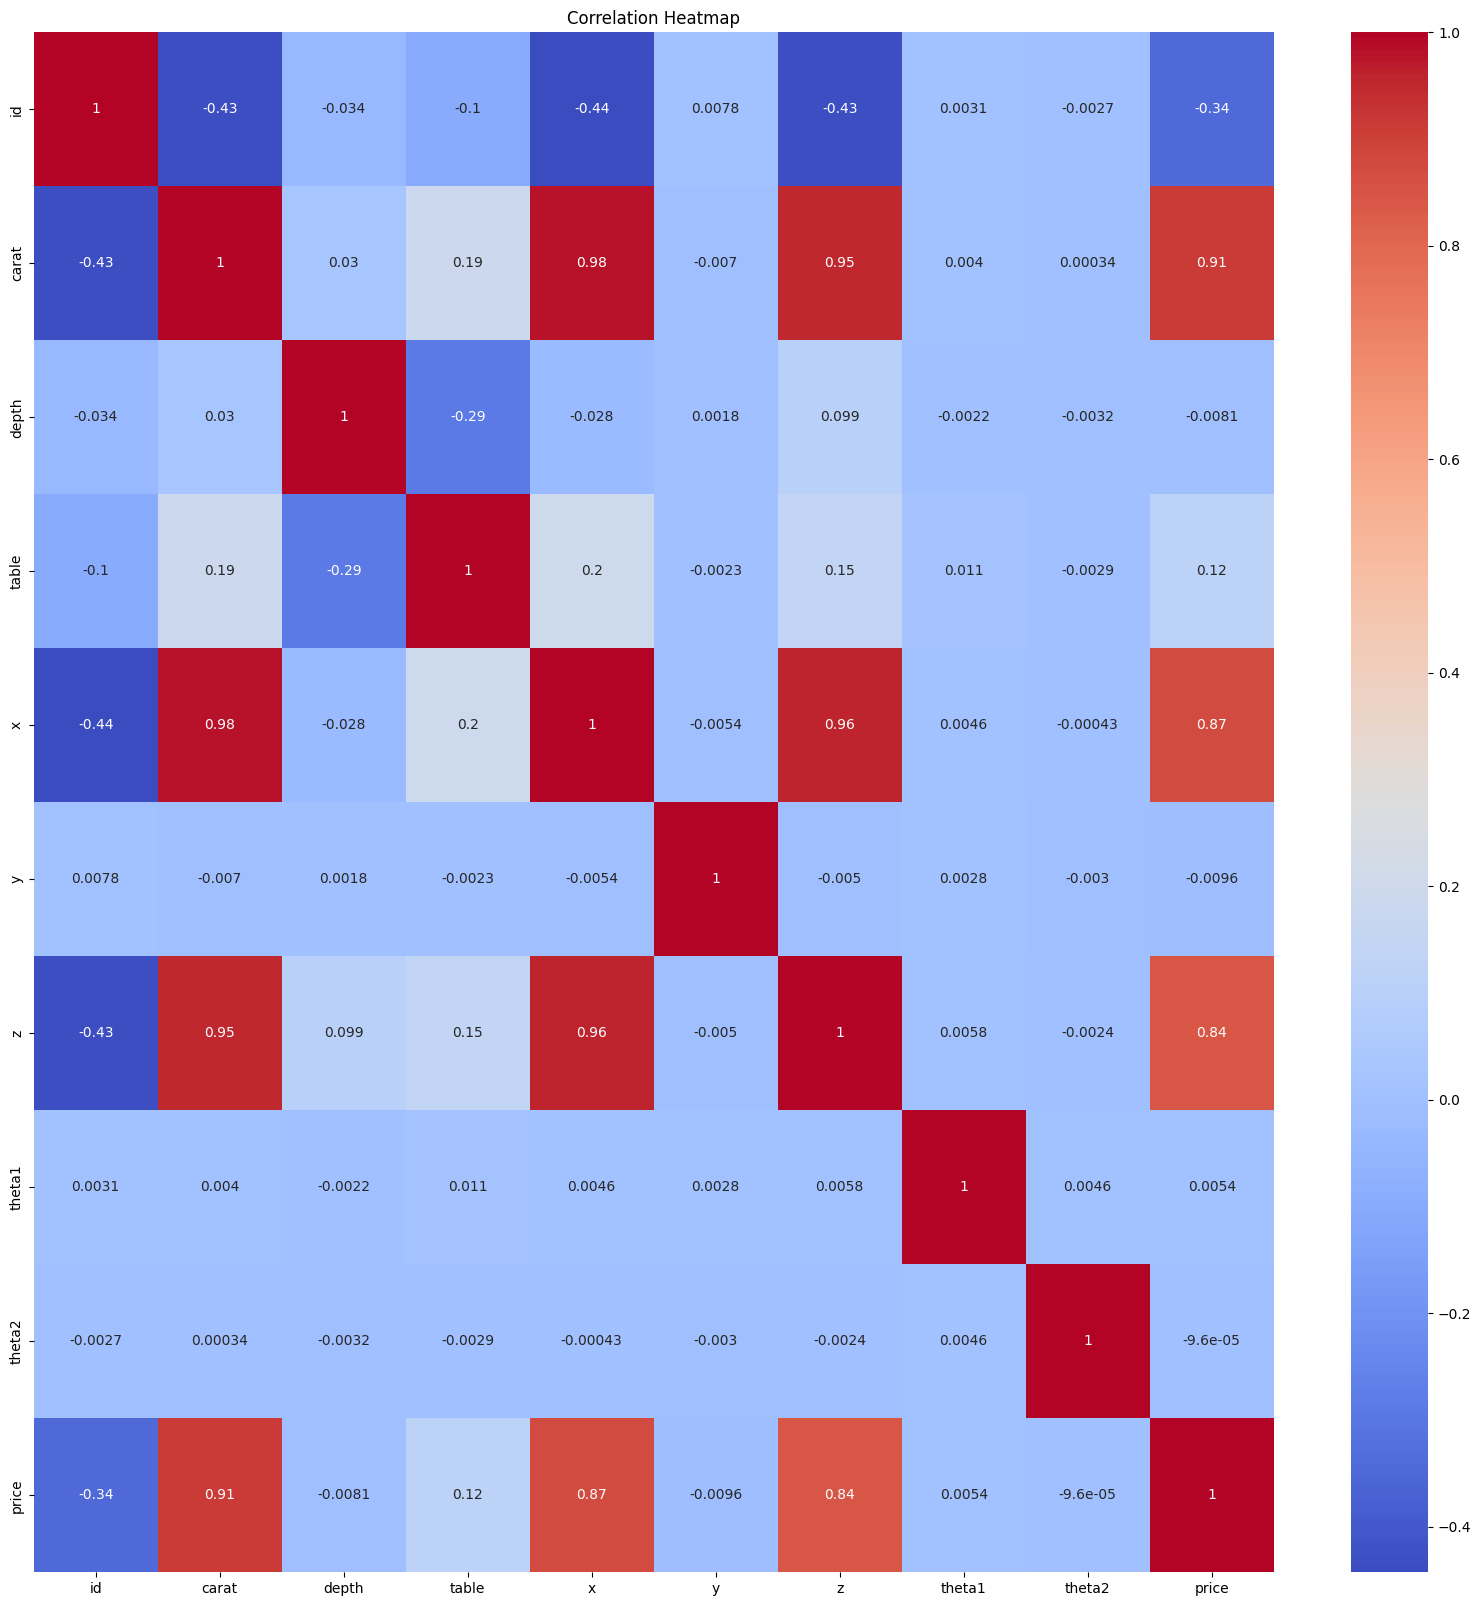

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

numeric_train = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_train.corr()

# Построение тепловой карты - корелляций
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Нужно поработать с выбросами, особенно по *y*

Я решил, что для удаления выбросов я буду использовать линейную интерполяцию

In [12]:
train.dropna(axis=0,inplace=True) #удаляем все строки, где пропущенны данные
#df = df.fillna(df.mode().iloc[0]) #заполнеям все строки, где пропущенны данные, их модой

#Удаление выбросов по всем числовым столбцам x и y
threshold = 3 * train['x'].std()
train = train[abs(train['x'] - train['x'].mean()) < threshold]

threshold = 3 * train['y'].std()
train = train[abs(train['y'] - train['y'].mean()) < threshold]

In [13]:
train = pd.get_dummies(train, columns=['color','clarity','cut'])
train = train.drop(columns=['theta1', 'theta2'])

In [14]:
from sklearn.model_selection import train_test_split

#Разделяем наш датасет на train и test
Y1 = train['price']

X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3) # train = 0.7 датасета, остальное test


In [15]:
y_test

6126      521
498       911
10719    1153
32036    5486
32954    5759
         ... 
10015     995
35194    7222
4261      374
17043    1243
26121    4448
Name: price, Length: 12118, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_outliers(dataset):
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns # Выбор числовых столбцов

    # Создание графика для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(dataset[column], vert=False)  # Рисование ящика с усами
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

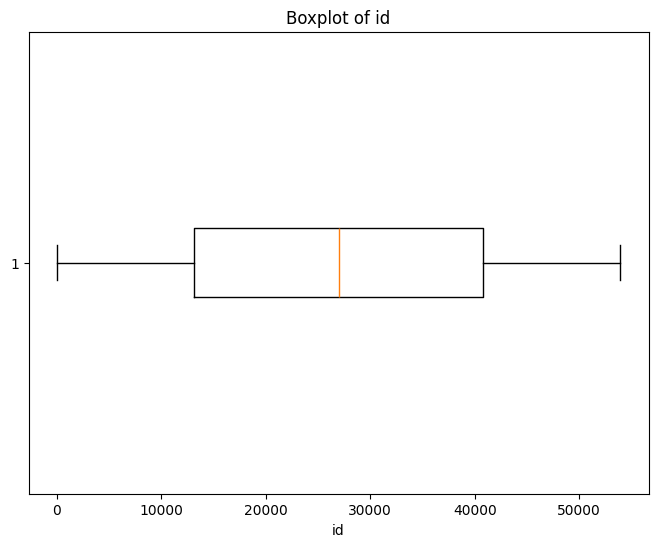

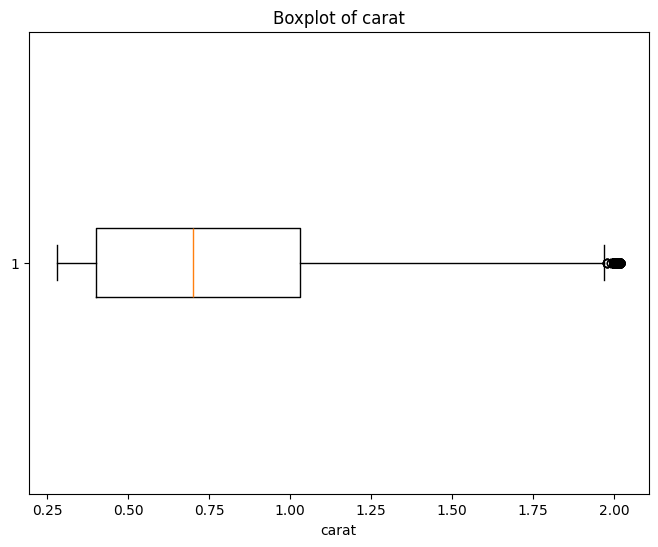

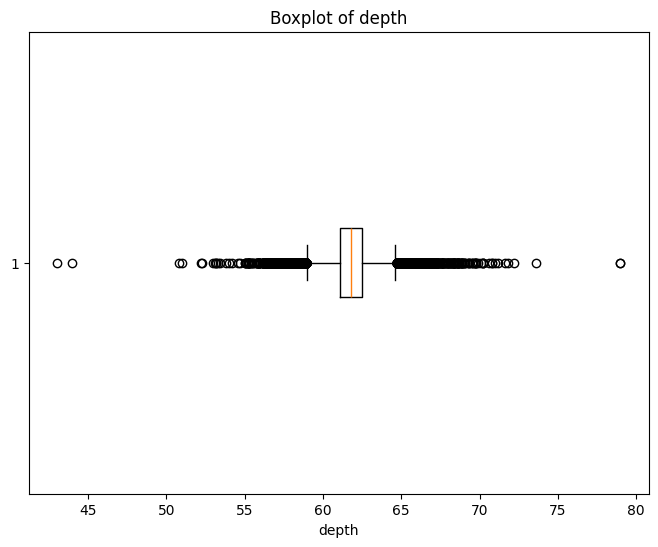

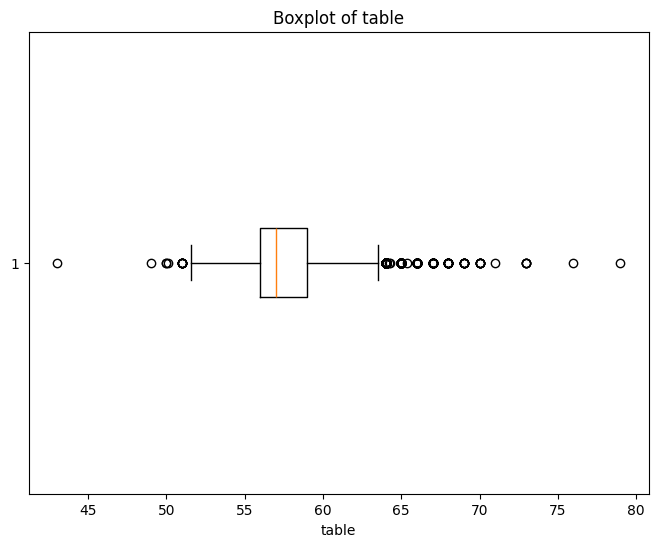

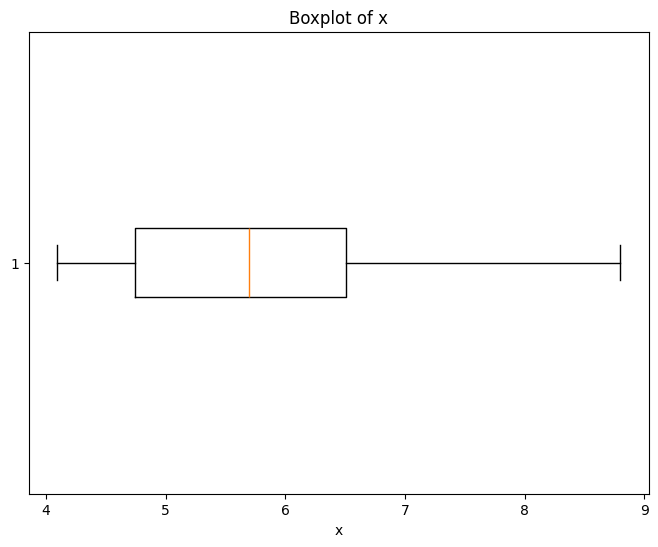

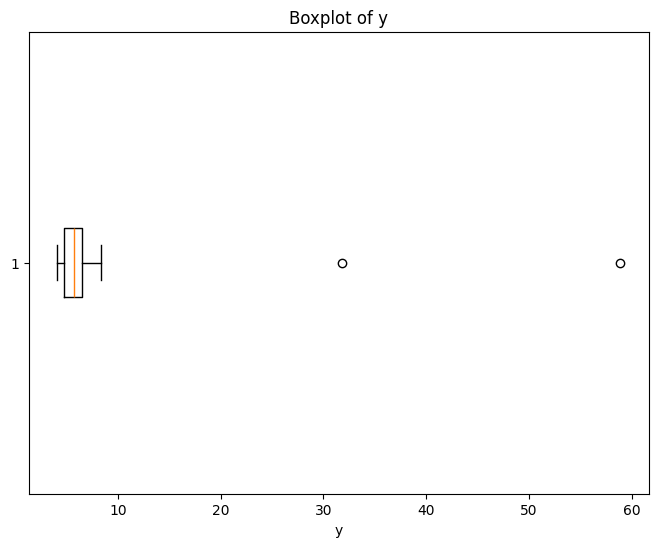

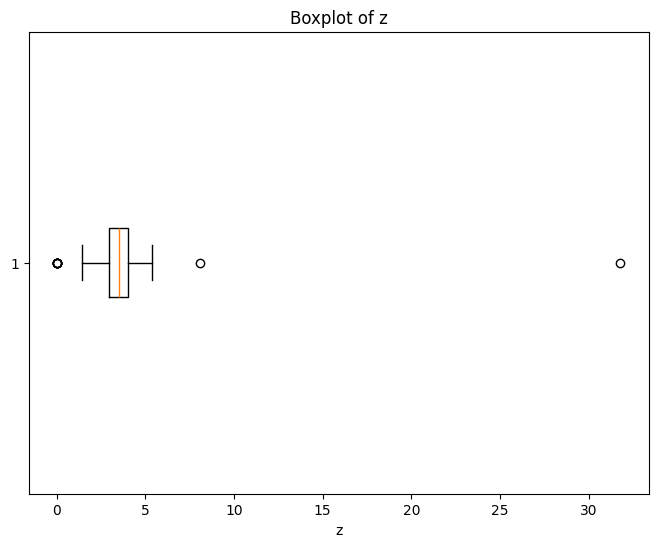

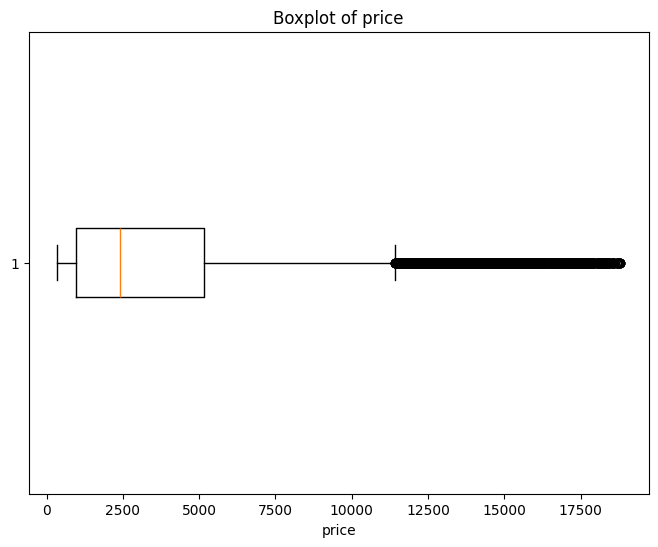

In [17]:
plot_outliers(train)

Как мы видим, присутствует много выбросов в y и z. Уберем их.

In [18]:
import pandas as pd
import numpy as np

def remove_outliers(dataset, threshold=1.5):
    columns = dataset.select_dtypes(include=[np.number]).columns # Выбор числовых столбцов
    """
    Удаляет выбросы из указанных числовых столбцов датасета на основе IQR.
    
    Аргументы:
    - dataset: pandas DataFrame, исходный датасет
    - columns: список строк, имена числовых столбцов, из которых нужно удалить выбросы
    - threshold: числовое значение, коэффициент IQR для определения границ выбросов (по умолчанию 1.5)
    
    Возвращает:
    - pandas DataFrame, датасет без выбросов
    """

    dataset_no_outliers = dataset.copy()

    for column in columns:
        q1 = dataset[column].quantile(0.25)
        q3 = dataset[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        dataset_no_outliers = dataset_no_outliers[
            (dataset_no_outliers[column] >= lower_bound) &
            (dataset_no_outliers[column] <= upper_bound)
        ]

    return dataset_no_outliers

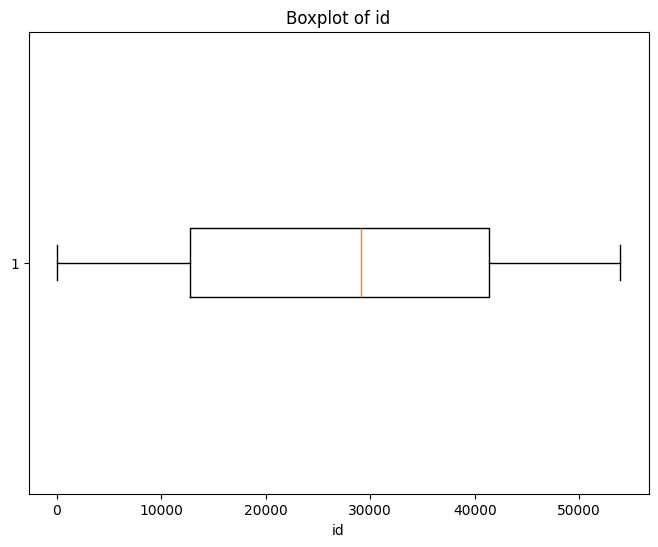

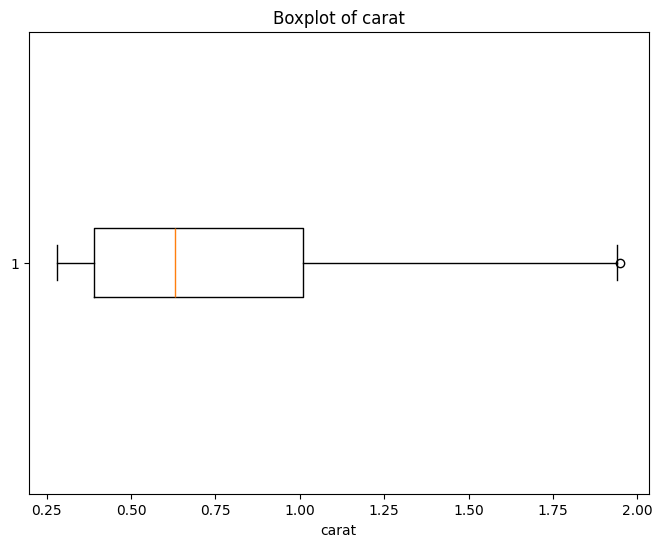

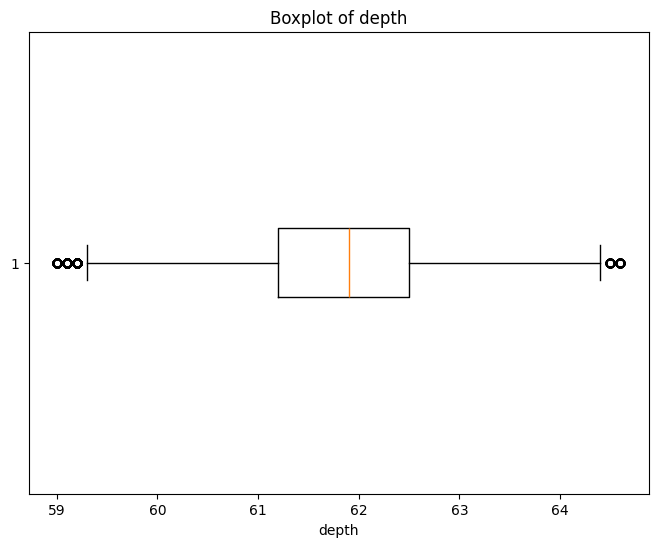

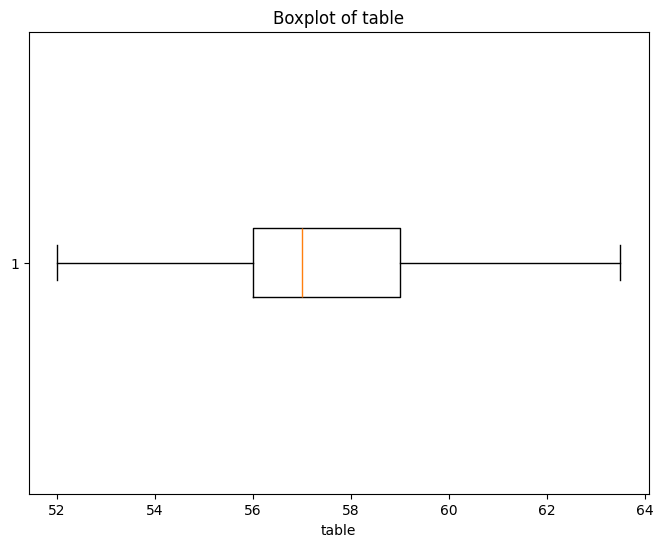

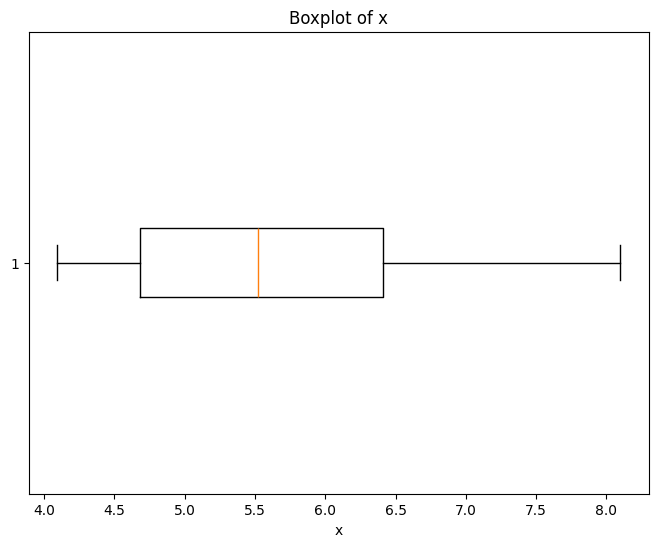

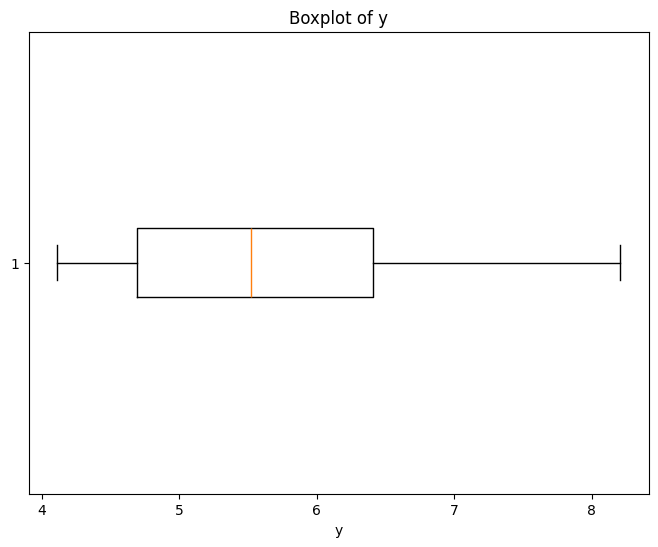

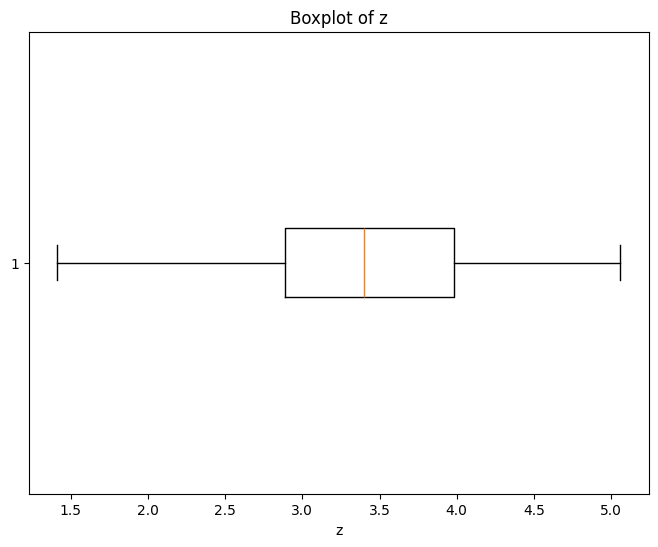

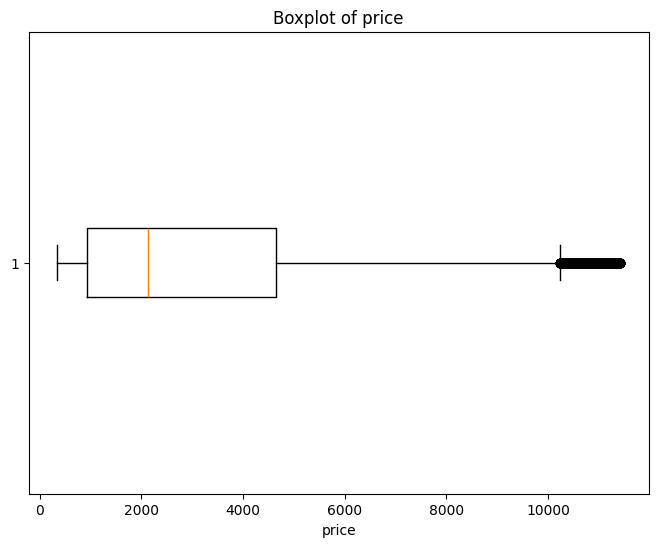

In [19]:
train = remove_outliers(train)
plot_outliers(train)

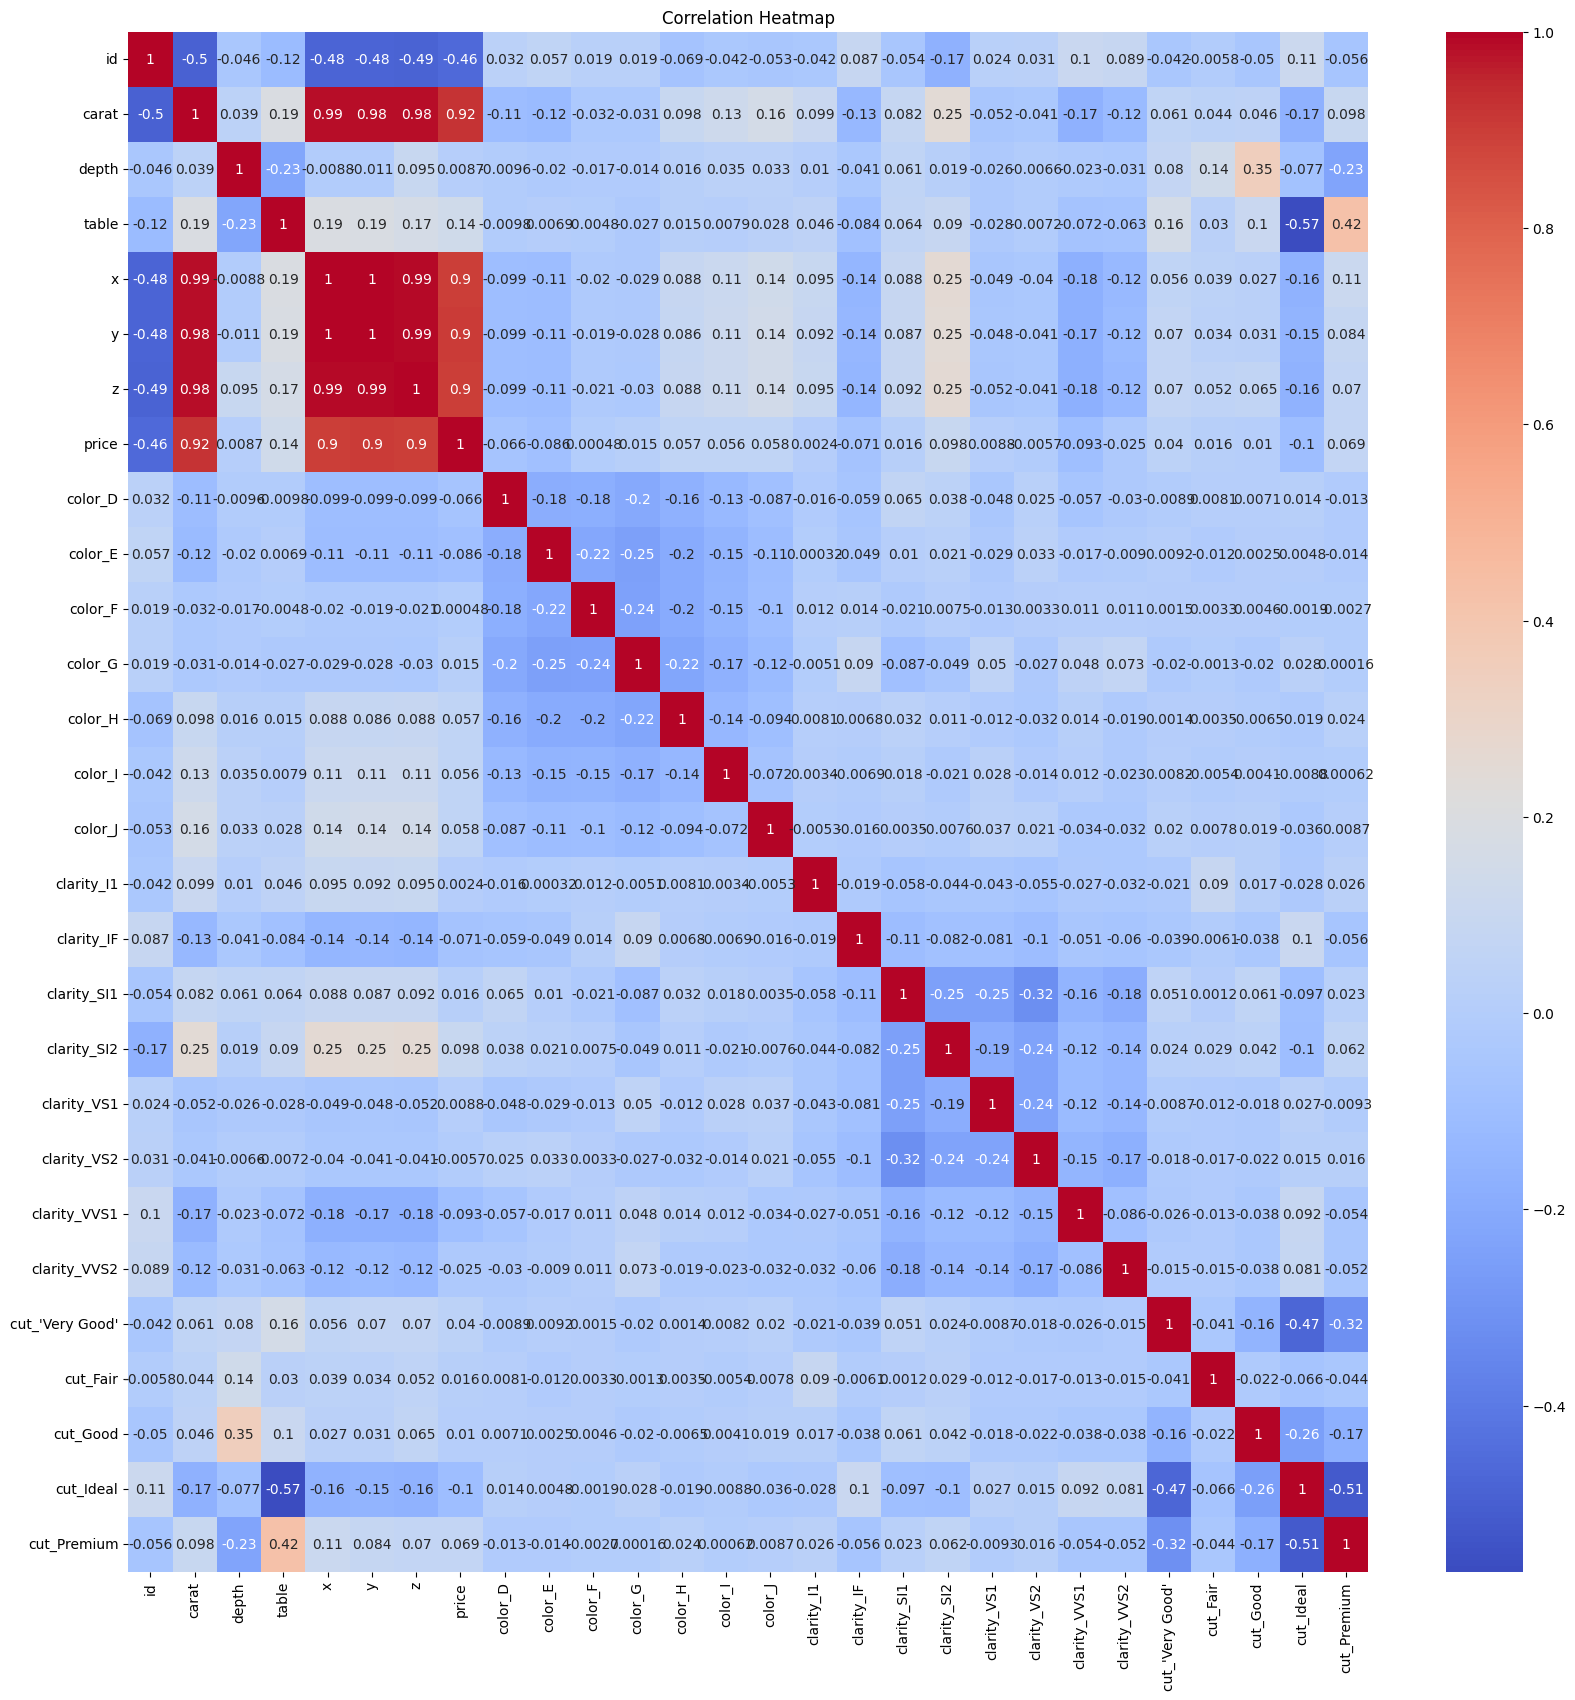

In [20]:
correlation_matrix = train.corr()

# Построение тепловой карты - корелляций
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Цена очень сильно коллерирует с размерами бриллианта, его весом(ну это было итак довольно логично, к бабке не ходи)

Также можно заметить, что размеры тоже друг с другом коррелируют, что тоже довольно логично (где вы видели тонкий бриллиант огромной площади?)

![image](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diagrams/diamond-dimensions.png)

Также можно заметить, что чем больше площадка бриллианта, тем с большей вероятностью он будет сиять как премиальный бриллиант.

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmQkgKetmvssv3sSzF3ryMyzM-YneZo202-g&usqp=CAU)

Также видно, чем "глубже" бриллиант - тем меньше шанс отнести его к премиальным и выше шанс отнести его к хорошим и плохим (по блеску)

![image](https://cms-media.taylorandhart.com/2022/10/26084820/Cut2-1000x916.jpg)

**Добавление новых признаков:** Так как есть сильная зависимость между линейными размерами я думаю вообще их снести и сделать один признак "объем" (V = x * y * z)

**Удаление мультиколлинеарных признаков:** Попробую удалить посмотреть что будет

**Использование регуляризации:** Регуляризация L1 или L2

MAE =  643.76735059086
Минимальная цена в предсказании = 0.0
Количество значений меньше нуля = 0
Среднее всех значений меньше нуля = nan


/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


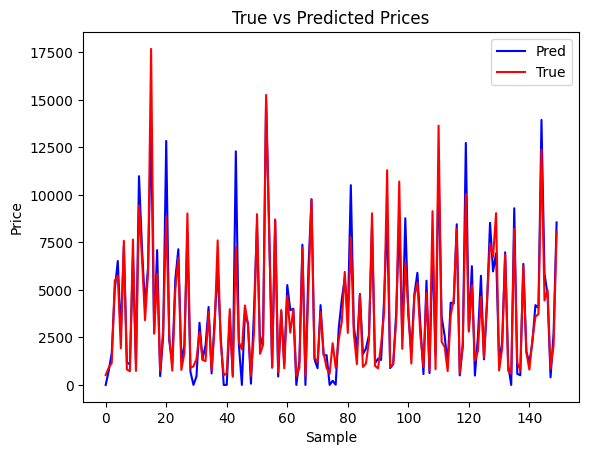

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

Y1 = train['price']
X1 = train.drop(columns = ['price'])

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)  # Обучаем нашу модель

y_pred = model_LR.predict(X_test)  # Предсказываем результат
y_pred = np.clip(y_pred, 0, None)

print('MAE = ', mean_absolute_error(y_test, y_pred))  # Считаем нашу метрику

print('Минимальная цена в предсказании =', np.min(y_pred))  # Ищем минимальную цену
print('Количество значений меньше нуля =', np.count_nonzero(y_pred < 0))
print('Среднее всех значений меньше нуля =', np.mean(y_pred[y_pred < 0]))

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

In [22]:
train['V'] = train['x'] * train['y'] * train['z']
train = train.drop(columns=['z', 'x', 'y'])

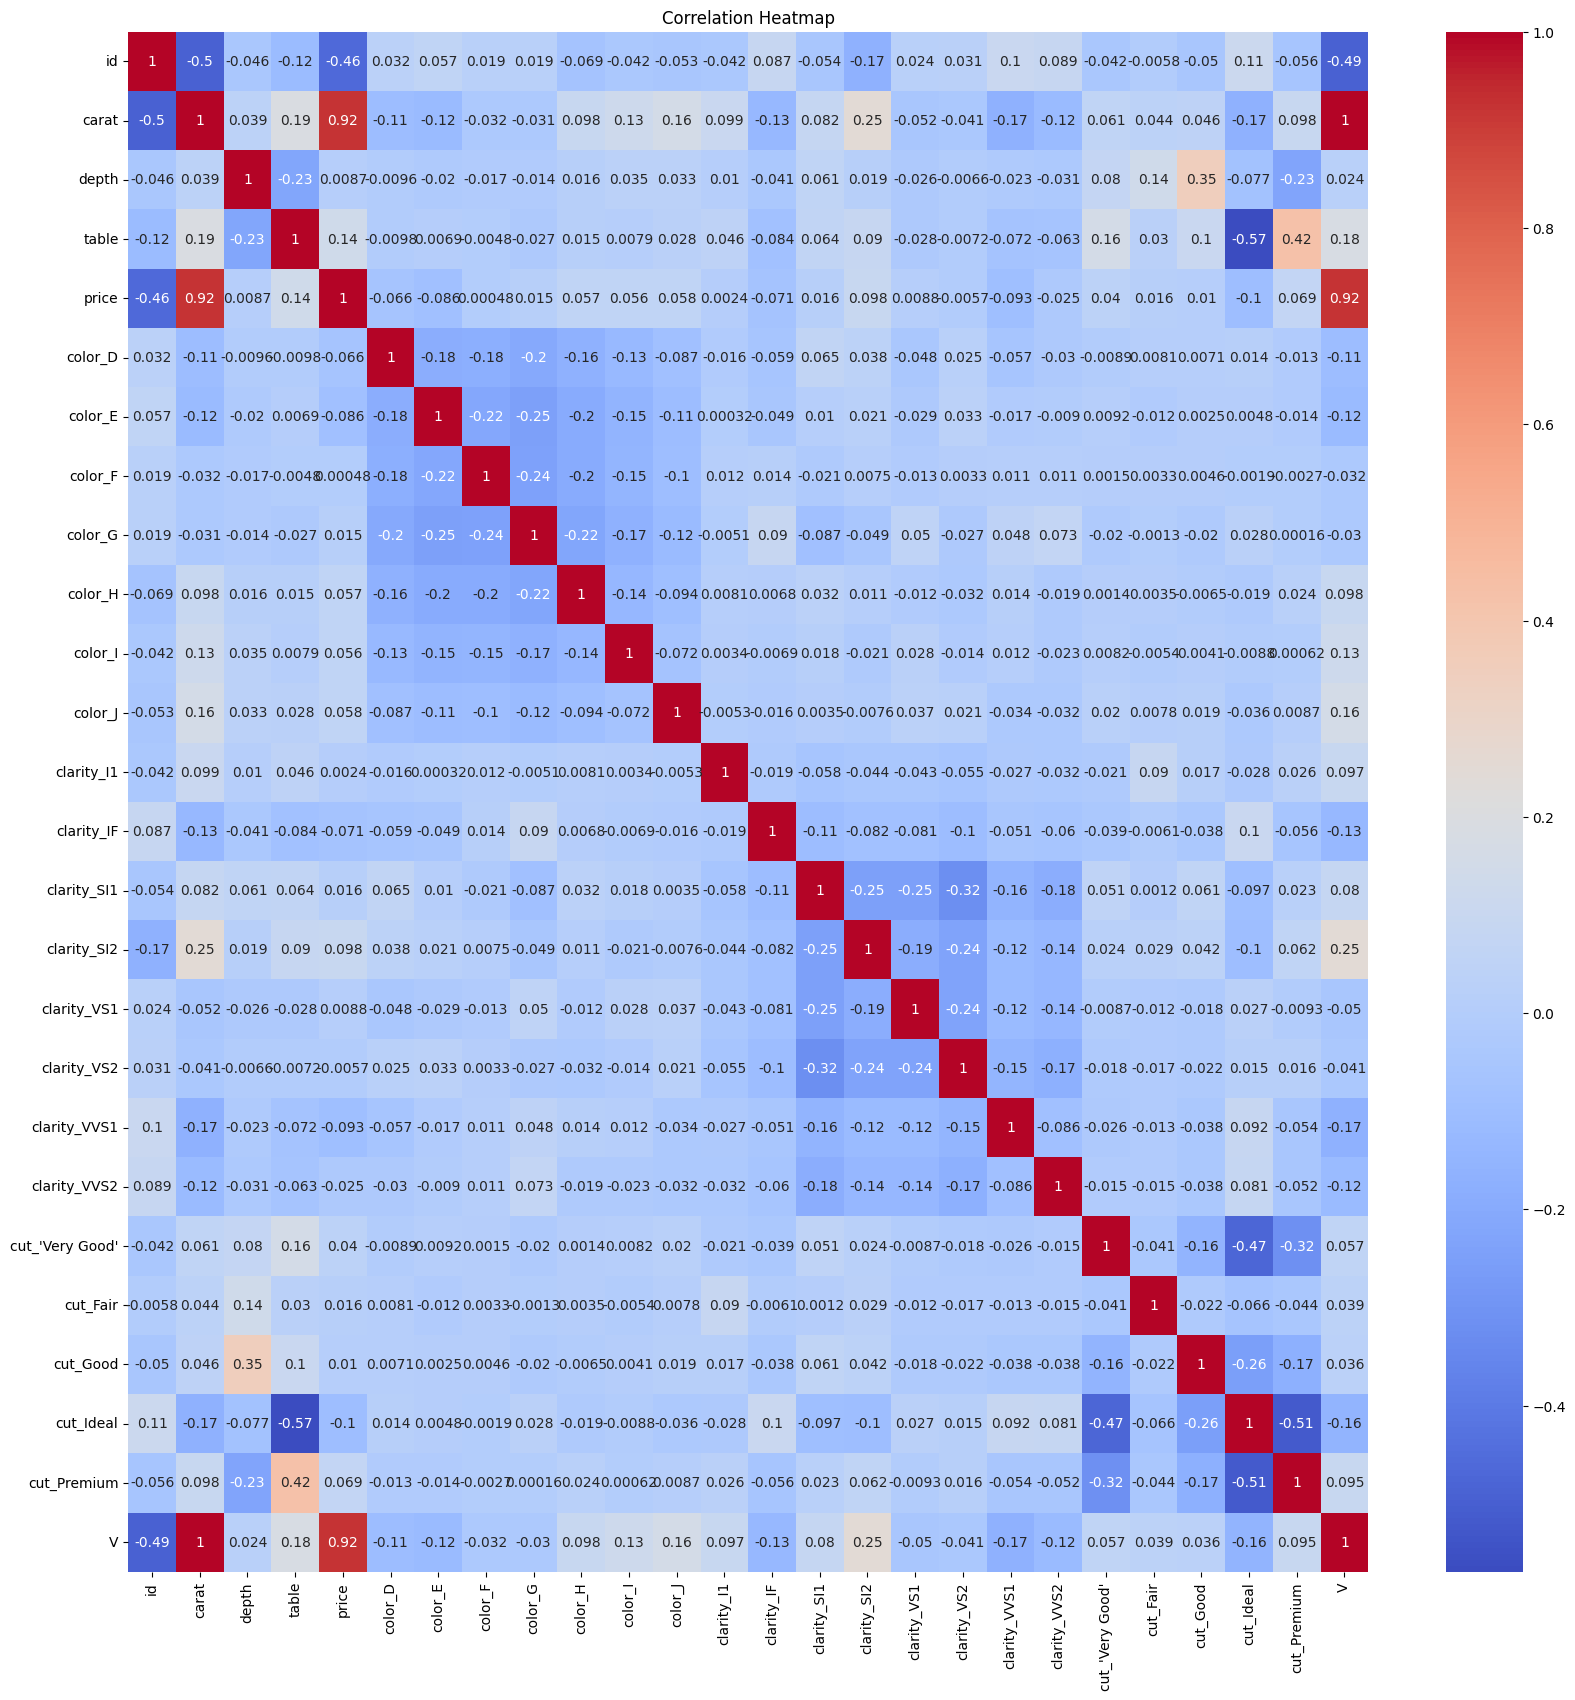

In [23]:
correlation_matrix = train.corr()

# Построение тепловой карты - корелляций
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

MAE =  508.6258963738389
Минимальная цена в предсказании = 0.0
Количество значений меньше нуля = 0
Среднее всех значений меньше нуля = nan


/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


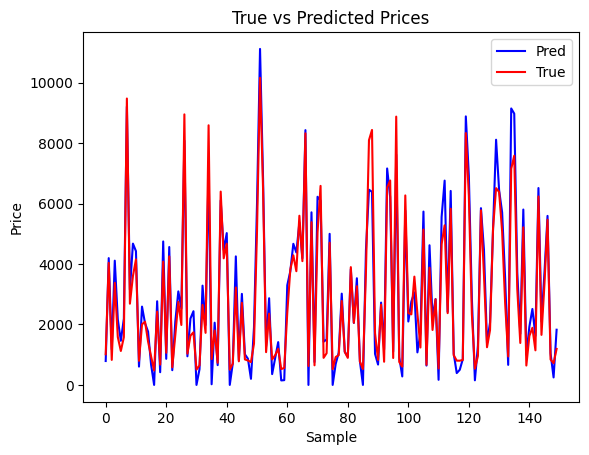

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

from sklearn.model_selection import train_test_split

#Разделяем наш датасет на train и test
Y1 = train['price']
X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3) # train = 0.7 датасета, остальное test


model_LR = LinearRegression()
model_LR.fit(X_train, y_train)  # Обучаем нашу модель

y_pred = model_LR.predict(X_test)  # Предсказываем результат
y_pred = np.clip(y_pred, 0, None)
print('MAE = ', mean_absolute_error(y_test, y_pred))  # Считаем нашу метрику

print('Минимальная цена в предсказании =', np.min(y_pred))  # Ищем минимальную цену
print('Количество значений меньше нуля =', np.count_nonzero(y_pred < 0))
print('Среднее всех значений меньше нуля =', np.mean(y_pred[y_pred < 0]))

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

Ну вот! Другое дело. MAE уже выглядит получше...

Можно применить регуляризацию L1


In [25]:
from sklearn.linear_model import Lasso

# Предположим, что у вас есть признаки (features) X и целевая переменная (target) y

Y1 = train['price']
X1 = train.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3)

In [26]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=10)  # Здесь cv - это количество фолдов в кросс-валидации
lasso_cv.fit(X_train, y_train)

# Оптимальное значение alpha
optimal_alpha = lasso_cv.alpha_

In [27]:
print(optimal_alpha)

19633.743453194253


MAE =  686.7060831243178
Минимальная цена в предсказании = 361.9454118400786
Количество значений меньше нуля = 0
Среднее всех значений меньше нуля = nan


/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alexvilno/Desktop/Lab_1_ML/ML_LAB_1/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


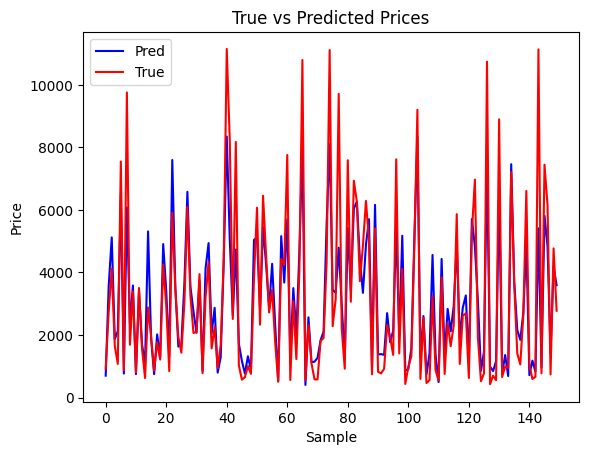

In [28]:
# Создание и обучение модели линейной регрессии с L1 регуляризацией
lasso = Lasso(alpha=optimal_alpha)  # Здесь alpha - это параметр регуляризации, вы можете настроить его значение
lasso.fit(X_train, y_train)


# Генерация прогнозов
y_pred = lasso.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
print('MAE = ', mean_absolute_error(y_test, y_pred))  # Считаем нашу метрику

print('Минимальная цена в предсказании =', np.min(y_pred))  # Ищем минимальную цену
print('Количество значений меньше нуля =', np.count_nonzero(y_pred < 0))
print('Среднее всех значений меньше нуля =', np.mean(y_pred[y_pred < 0]))

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

MAE =  488612051.7815585


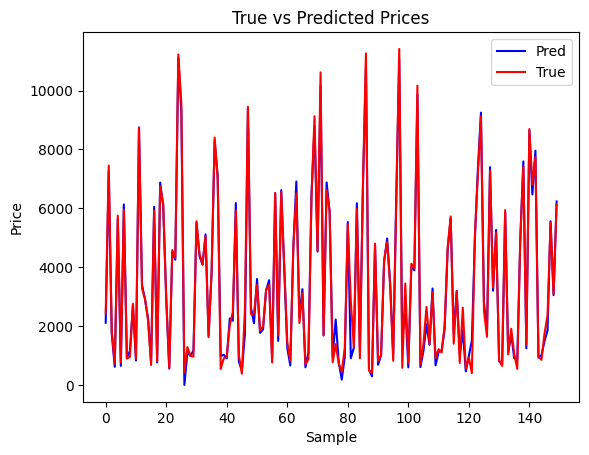

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Предположим, что у вас есть признаки (features) X и целевая переменная (target) y

Y1 = train['price']
X1 = train.drop(columns = ['price'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.1)

# Определение пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Преобразование данных с помощью StandardScaler
    ('poly_features', PolynomialFeatures(degree=3)),  # Создание полиномиальных признаков
    ('linear_regression', LinearRegression())  # Линейная регрессия
])

# Обучение пайплайна
pipeline.fit(X_train, y_train)

# Генерация прогнозов на тестовой выборке
y_pred = pipeline.predict(X_test)
y_pred = np.clip(y_pred, 0, None)
print('MAE = ', mean_absolute_error(y_test, y_pred))  # Считаем нашу метрику

plt.plot(y_pred[:150], color='b', label='Pred')
plt.plot(y_test.to_numpy()[:150], color='r', label="True")

plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('True vs Predicted Prices')
plt.legend()
plt.show()

Предсказание с удаленными признаками ```x, y, x``` и добавленным ```V```

In [30]:
test = pd.read_csv(path.join(sep, file_path, 'test.csv'))
ids = test['id']

In [31]:
test = pd.get_dummies(test, columns=['color','clarity','cut'])
test['V'] = test['x'] * test['y'] * test['z']
test = test.drop(columns=['theta1', 'theta2', 'x', 'y', 'z'])
y_pred = pipeline.predict(test)
y_pred = np.clip(y_pred, 0, None)

In [32]:
result_df = pd.DataFrame({'id': ids, 'price': y_pred})

In [33]:
result_df.to_csv('result.csv', index=False)